In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from Function import load_and_preprocess_data, split_data, create_dataloaders, LSTMModel , train_model, evaluate_model
import torch
from torch import nn

In [2]:
file_path = "Rainfall_data.csv"
df = load_and_preprocess_data(file_path)

Dataset loaded successfully.
Date column processed and indexed.
No missing values detected.
Data normalized using Min-Max scaling.


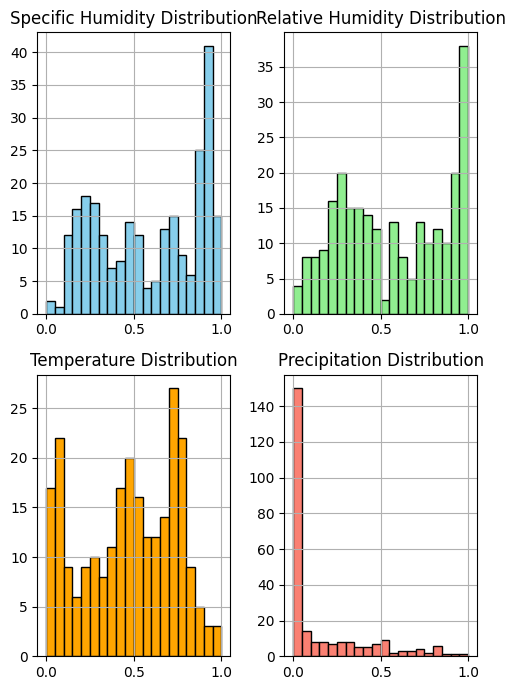

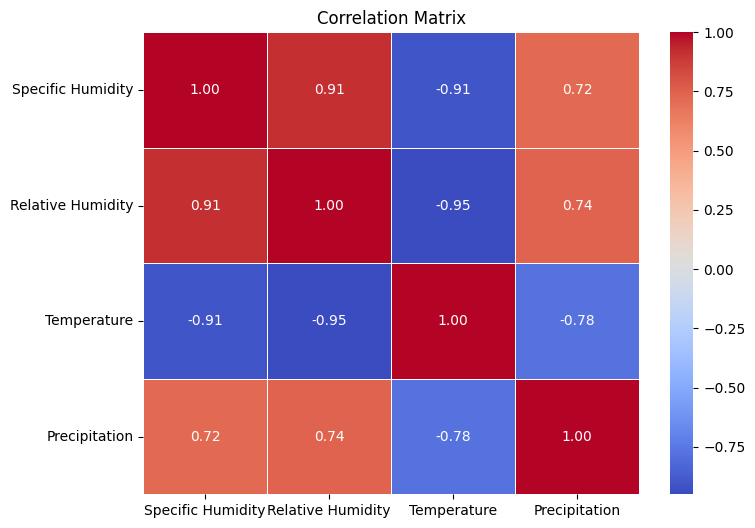

Data split into train and test sets.
DataLoaders created successfully.


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 100/1000, Loss: 0.0156
Epoch 200/1000, Loss: 0.0144
Epoch 300/1000, Loss: 0.0137
Epoch 400/1000, Loss: 0.0137
Epoch 500/1000, Loss: 0.0130
Epoch 600/1000, Loss: 0.0111
Epoch 700/1000, Loss: 0.0122
Epoch 800/1000, Loss: 0.0115
Epoch 900/1000, Loss: 0.0117
Epoch 1000/1000, Loss: 0.0109
Model training completed.


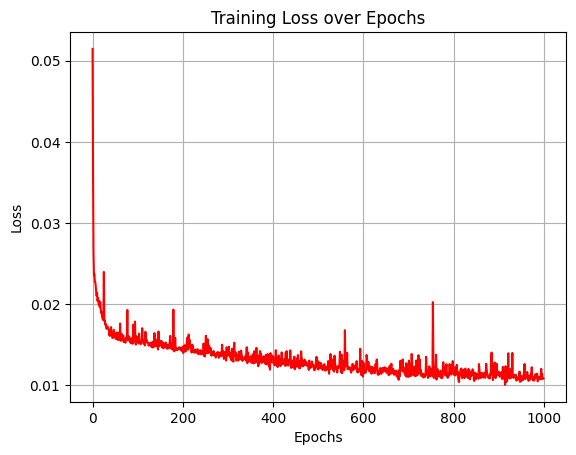

c:\Users\Dell\Work_tasks\LSTM\Function.py:138: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  test_predictions = torch.tensor(test_predictions).view(-1).numpy()


Mean Squared Error (MSE): 0.0048
Mean Absolute Error (MAE): 0.0468
R-squared (R2): 0.9314


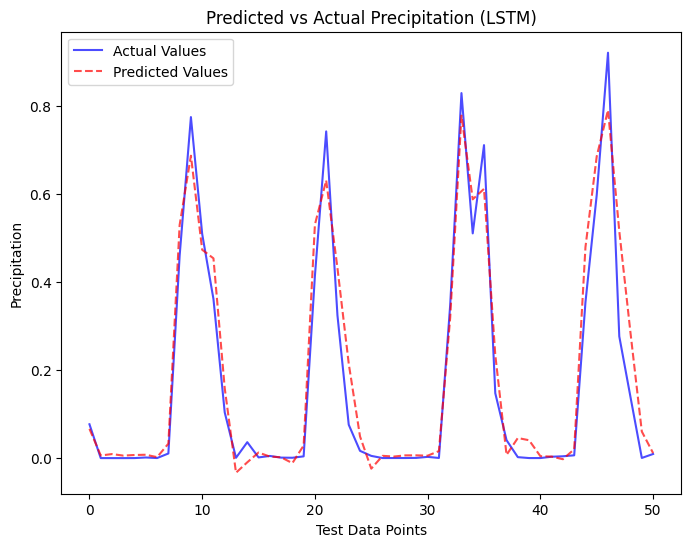

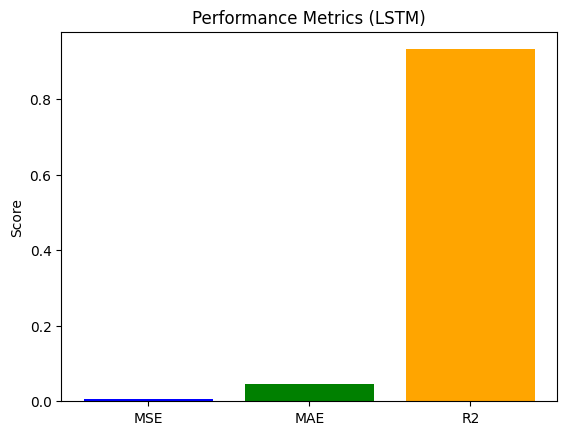

In [3]:
if df is not None:
    plt.figure(figsize=(5, 7))

    # Plot histograms for each feature
    plt.subplot(2, 2, 1)
    df["Specific Humidity"].hist(color='skyblue', edgecolor='black', bins=20)
    plt.title("Specific Humidity Distribution")
    
    plt.subplot(2, 2, 2)
    df["Relative Humidity"].hist(color='lightgreen', edgecolor='black', bins=20)
    plt.title("Relative Humidity Distribution")
    
    plt.subplot(2, 2, 3)
    df["Temperature"].hist(color='orange', edgecolor='black', bins=20)
    plt.title("Temperature Distribution")
    
    plt.subplot(2, 2, 4)
    df["Precipitation"].hist(color='salmon', edgecolor='black', bins=20)
    plt.title("Precipitation Distribution")
    
    plt.tight_layout()
    plt.show()

    # Plot Correlation Matrix using seaborn heatmap to check correlation
    correlation_matrix = df.corr()

    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data(df)
    train_loader, test_loader = create_dataloaders(X_train, y_train, X_test, y_test)

    input_size = 3
    hidden_size = 64
    num_layers = 1
    output_size = 1

    # Initialize and train the LSTM model
    lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

    train_model(lstm_model, train_loader, criterion, optimizer, epochs=1000)

    # Evaluate the LSTM model
    mse, mae, r2 = evaluate_model(lstm_model, test_loader)

    # Predicted vs Actual Plot
    lstm_model.eval()
    with torch.no_grad():
        predicted_values = []
        actual_values = []
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.view(X_batch.size(0), 1, -1)
            predictions = lstm_model(X_batch)
            predicted_values.extend(predictions.numpy())
            actual_values.extend(y_batch.numpy())

    plt.figure(figsize=(8, 6))
    plt.plot(actual_values, label='Actual Values', color='blue', alpha=0.7)
    plt.plot(predicted_values, label='Predicted Values', color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Test Data Points')
    plt.ylabel('Precipitation')
    plt.title('Predicted vs Actual Precipitation (LSTM)')
    plt.legend()
    plt.show()

    # Plot Performance Metrics
    metrics = {"MSE": mse, "MAE": mae, "R2": r2}
    plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange'])
    plt.title("Performance Metrics (LSTM)")
    plt.ylabel("Score")
    plt.show()
